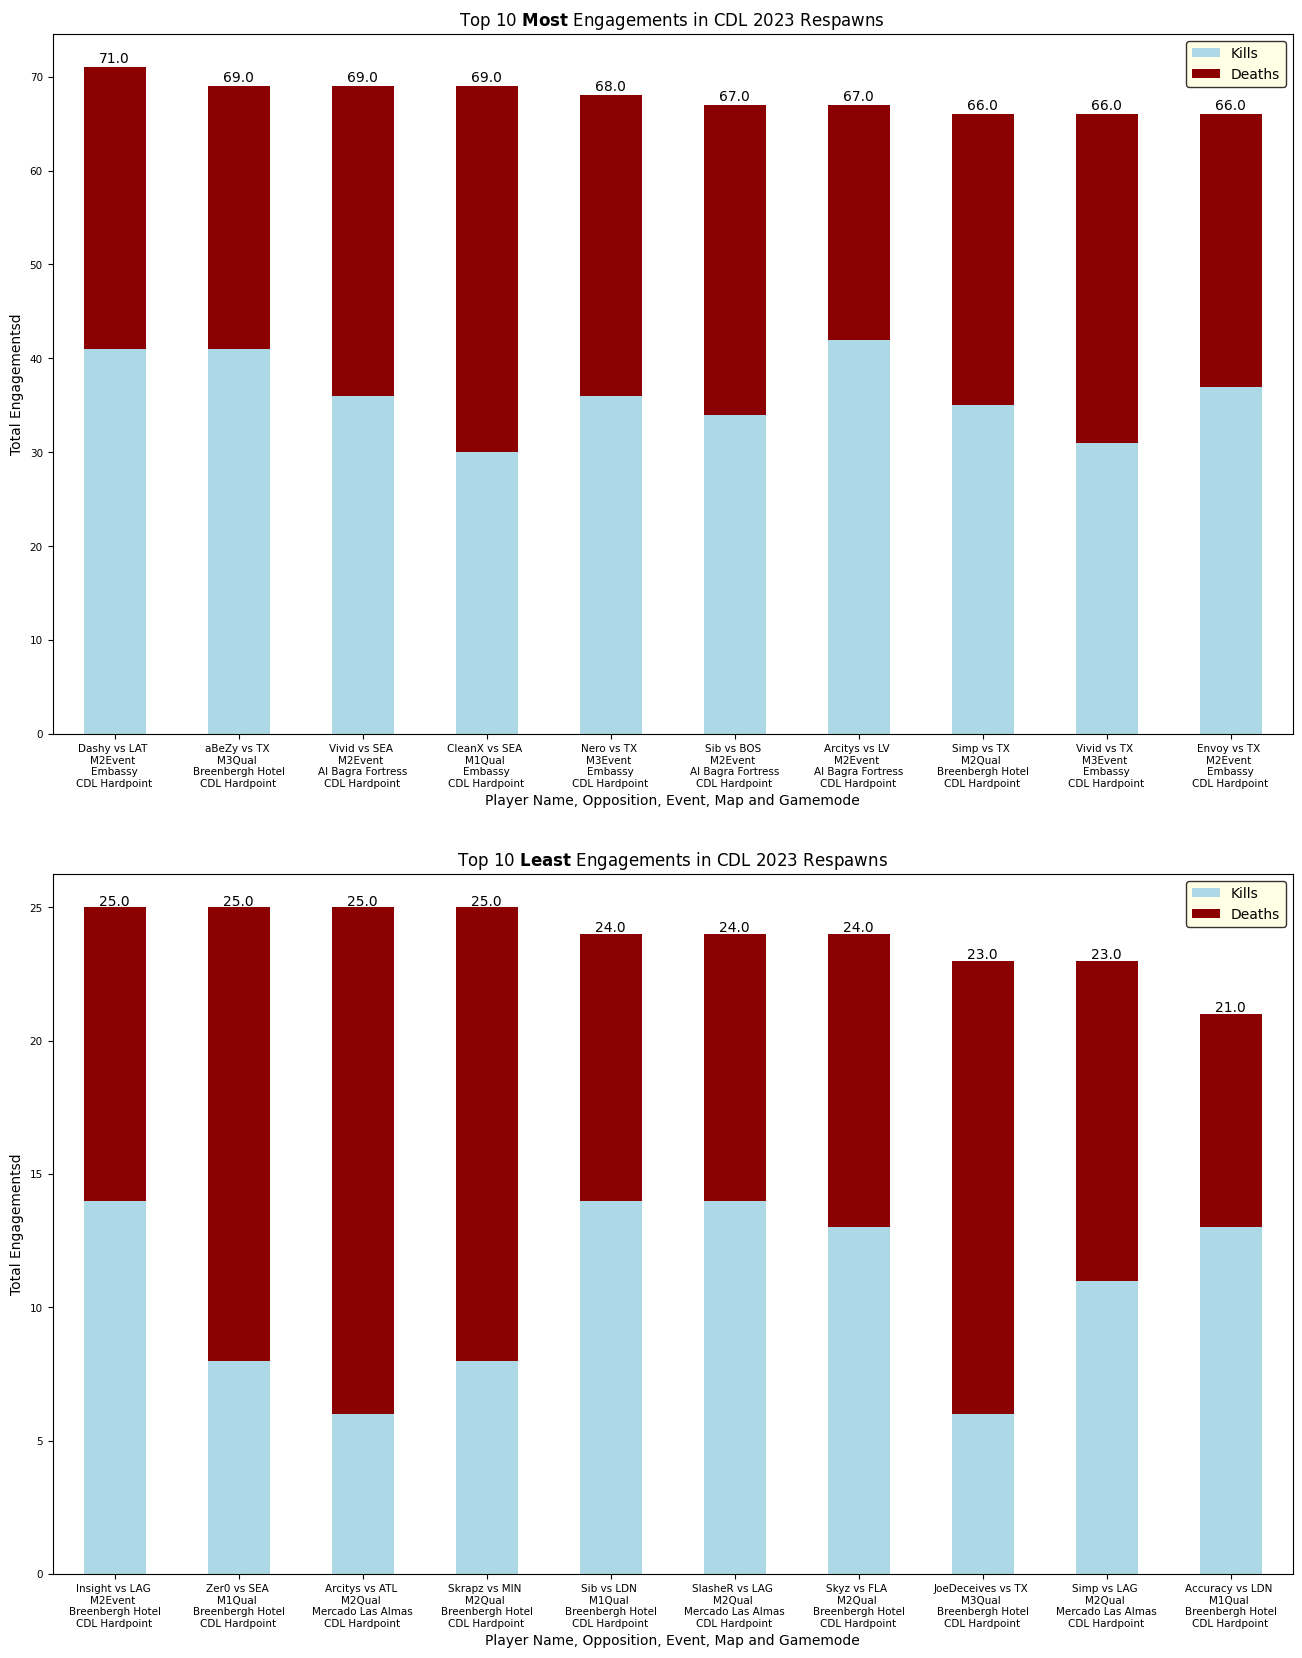

In [1]:
import pandas as pd
from cdl_helper import read_in_all_matches
import matplotlib.pyplot as plt

def engagements(df, title_ext=None):
    df['engagements'] = df['totalKills'] + df['totalDeaths']
    df = df[df['gameMode'] != 'CDL SnD']
    sorted_df = df.sort_values(by='engagements', ascending=False)

    sorted_df['fullDescription'] = [f"{player} vs {op} \n{ev} \n{map_}\n{mode}" for player, op, map_, mode, ev in zip(sorted_df['alias'], sorted_df['oppo_abbrev'], sorted_df['gameMap'], sorted_df['gameMode'], sorted_df['event'])]

    sorted_df = sorted_df[sorted_df['lethalsUsed'] > 1]
    
    most_used = sorted_df[['fullDescription', 'totalKills', 'totalDeaths']].iloc[0:10].set_index('fullDescription')
    least_used = sorted_df[['fullDescription', 'totalKills', 'totalDeaths']].iloc[-10:].set_index('fullDescription')

    most_used.rename(columns={'totalKills': 'Kills',
                                'totalDeaths': 'Deaths'}, inplace=True)

    least_used.rename(columns={'totalKills': 'Kills',
                                'totalDeaths': 'Deaths'}, inplace=True)

    fig = plt.figure(figsize=(16, 20))
    ax1, ax2 = fig.subplots(nrows=2)
    most_used.plot(kind='bar', stacked=True, ax=ax1, color=['lightblue', 'darkred'])
    least_used.plot(kind='bar', stacked=True, ax=ax2, color=['lightblue', 'darkred'])

    my_axes = [ax1, ax2]
    for axes in my_axes:
        axes.tick_params(rotation=0, labelsize=7.5)
        axes.set_ylabel("Total Engagementsd")
        axes.set_xlabel("Player Name, Opposition, Event, Map and Gamemode")
        legend_frame = axes.legend(loc='upper right').get_frame()
        legend_frame.set_facecolor("lightyellow")
        legend_frame.set_edgecolor("black")

    for i, used in enumerate(sorted_df["engagements"][0:10]):
        ax1.text(x=ax1.get_xticks()[i], y=used+0.5, s=used, horizontalalignment='center')

    for i, used in enumerate(sorted_df["engagements"][-10:]):
        ax2.text(x=ax2.get_xticks()[i], y=used+0.08, s=used, horizontalalignment='center')

    ax1.set_title(fr"Top 10 $\bfMost$ Engagements in CDL 2023 Respawns {title_ext if title_ext else ''}")
    ax2.set_title(fr"Top 10 $\bfLeast$ Engagements in CDL 2023 Respawns {title_ext if title_ext else ''}")
    return fig

df = read_in_all_matches()
df = df[df['gameMode']=='CDL Hardpoint']
fig = engagements(df)